Model equation is y=-3.55x + 3.91


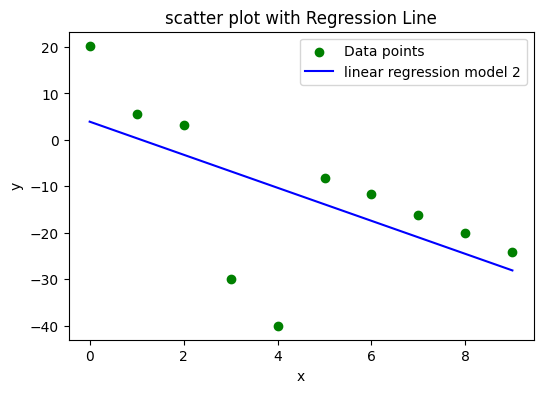

   x      y     y_pred
0  0  20.26   3.916727
1  1   5.61   0.359455
2  2   3.14  -3.197818
3  3 -30.00  -6.755091
4  4 -40.00 -10.312364
5  5  -8.13 -13.869636
6  6 -11.73 -17.426909
7  7 -16.08 -20.984182
8  8 -19.95 -24.541455
9  9 -24.03 -28.098727
loss(Beeta=1       and Model 2): 0.9732472128655365
loss(Beeta=10^(-6) and Model 2): 0.9999999999999721
loss(Beeta=10^(3)  and Model 2): 0.00018824604445913878
loss(Beeta=1       and Model 1): 0.435416262490386
loss(Beeta=10^(-6) and Model 1): 0.9999999998258207
loss(Beeta=10^(3)  and Model 1): 0.0002268287498440988


In [4]:
# Creating data frame using given data
import pandas as pd

data = {
    "x": [0,1,2,3,4,5,6,7,8,9],
    "y": [20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03]
}
df = pd.DataFrame(data)

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X=df[["x"]]
y=df["y"]
model.fit(X,y)




import math

def truncate_float(num,n):
    num*=10**n
    return int(num)/10**n

m = model.coef_[0]
c = model.intercept_

print("="*40)
print(f"Model equation is y={truncate_float(m,2)}x + {truncate_float(c,2)}")
print("="*40)

df['y_pred']=model.predict(df[['x']])

plt.figure(figsize=(6,4))
plt.scatter(df["x"],df["y"],color='green',label="Data points")
plt.plot(df['x'],df['y_pred'],color='blue',label='linear regression model 2')
#plt.plot(df['x'],df['y_pred_model1'],color='r',label='linear regression model 1')
plt.xlabel("x")
plt.ylabel("y")
plt.title("scatter plot with Regression Line")
plt.legend()
plt.show()

print(df)

def loss_funtion(df,df_x,df_y,df_ypred,beeta,N):
    beeta_squared = beeta**2
    df['defference']= (df_y-df_ypred)**2/((df_y-df_ypred)**2+beeta_squared)
    return (1/N)*(df['defference'].sum())

# beeta = 1
print(f"loss(Beeta=1       and Model 2): {loss_funtion(df,df['x'],df['y'],df['y_pred'],1,10)}")
print(f"loss(Beeta=10^(-6) and Model 2): {loss_funtion(df,df['x'],df['y'],df['y_pred'],10**-6,10)}")
print(f"loss(Beeta=10^(3)  and Model 2): {loss_funtion(df,df['x'],df['y'],df['y_pred'],10**3,10)}")

df['y_pred_model1']=-4*df['x'] + 12

# beeta = 1
print(f"loss(Beeta=1       and Model 1): {loss_funtion(df,df['x'],df['y'],df['y_pred_model1'],1,10)}")
print(f"loss(Beeta=10^(-6) and Model 1): {loss_funtion(df,df['x'],df['y'],df['y_pred_model1'],10**-6,10)}")
print(f"loss(Beeta=10^(3)  and Model 1): {loss_funtion(df,df['x'],df['y'],df['y_pred_model1'],10**3,10)}")



Model 2 (OLS): y = -3.557x + 3.917


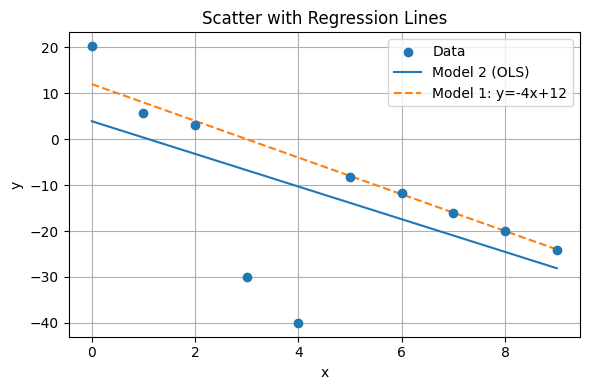

beta=1         L(Model 1)=0.435416   L(Model 2)=0.973247
beta=1e-06     L(Model 1)=1.000000   L(Model 2)=1.000000
beta=1000      L(Model 1)=0.000227   L(Model 2)=0.000188

MAD = 0.835  ->  beta≈1.6×MAD = 1.337
At beta≈1.337:  L(Model 1)=0.407962   L(Model 2)=0.953623


In [ ]:
# Creating data frame using given data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    "x": [0,1,2,3,4,5,6,7,8,9],
    "y": [20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03],
}
df = pd.DataFrame(data, dtype=float)

# --- Fit linear regression (Model 2) ---
model = LinearRegression()
X = df[["x"]]
y = df["y"]
model.fit(X, y)

m = model.coef_[0]
c = model.intercept_
print("="*40)
print(f"Model 2 (OLS): y = {round(m,3)}x + {round(c,3)}")
print("="*40)

df["y_pred"] = model.predict(df[["x"]])          # Model 2 predictions
df["y_pred_model1"] = -4*df["x"] + 12            # Model 1 predictions

# --- Plot ---
plt.figure(figsize=(6,4))
plt.scatter(df["x"], df["y"], label="Data", zorder=3)
plt.plot(df["x"], df["y_pred"], label="Model 2 (OLS)")
plt.plot(df["x"], df["y_pred_model1"], "--", label="Model 1: y=-4x+12")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Scatter with Regression Lines")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# --- Robust loss (Geman–McClure) without mutating df ---
def robust_loss(y_true, y_pred, beta):
    r = y_true - y_pred
    r2 = r*r
    return float((r2 / (r2 + beta*beta)).mean())

N = len(df)  # not needed anymore, but kept for clarity

for beta in [1.0, 1e-6, 1e3]:
    L2 = robust_loss(df["y"], df["y_pred"], beta)
    L1 = robust_loss(df["y"], df["y_pred_model1"], beta)
    print(f"beta={beta:<8g}  L(Model 1)={L1:.6f}   L(Model 2)={L2:.6f}")

# --- Optional: choose beta via MAD (recommended) ---
residuals = df["y"] - df["y_pred"]  # residuals for OLS
mad = (np.abs(residuals - np.median(residuals))).median()
beta_rec = 1.6 * mad if mad > 0 else 1.0
L1_rec = robust_loss(df["y"], df["y_pred_model1"], beta_rec)
L2_rec = robust_loss(df["y"], df["y_pred"], beta_rec)
print(f"\nMAD = {mad:.3f}  ->  beta≈1.6×MAD = {beta_rec:.3f}")
print(f"At beta≈{beta_rec:.3f}:  L(Model 1)={L1_rec:.6f}   L(Model 2)={L2_rec:.6f}")
